In [34]:
from snewpy.neutrino import Flavor

import matplotlib.pyplot as plt

import numpy as np
import uproot
import os

In [43]:
filename = 'sn_model_6_spectrum_6_hierarchy_normal_sqsin2theta_0.010000_collective_0_star_1_shocks_0_vaccuum_0_earth_0_invert_cs_0_inv_beta_1_e_scat_1_O16CC_1_O16NC_1_O18_1_nu_angle_0_energy_0MeV_to_100MeV_in_0.1MeV_steps_time_0.001s_resolution.root'
# filename = 'sn_model_401_spectrum_401_hierarchy_normal_sqsin2theta_0.010000_collective_0_star_0_shocks_0_vaccuum_0_earth_0_invert_cs_0_inv_beta_1_e_scat_1_O16CC_1_O16NC_1_O18_1_nu_angle_0_energy_0MeV_to_100MeV_in_0.1MeV_steps_time_0.0001s_resolution.root'
path = os.path.join(os.environ['ASTERIA'], 'scratch/data/', filename)
file = uproot.open(path)

In [44]:
file.keys()

['nu_e_flux_in_star;1',
 'nu_e_mean_energy_in_star;1',
 'nu_e_oscillated_flux_fraction;1',
 'nu_e_oscillated_mean_energy;1',
 'nu_e_unscaled_hit_probability;1',
 'nu_e_photonic_energy_distance_1kpc;1',
 'anti_nu_e_flux_in_star;1',
 'anti_nu_e_mean_energy_in_star;1',
 'anti_nu_e_oscillated_flux_fraction;1',
 'anti_nu_e_oscillated_mean_energy;1',
 'anti_nu_e_unscaled_hit_probability;1',
 'anti_nu_e_photonic_energy_distance_1kpc;1',
 'nu_x_flux_in_star;1',
 'nu_x_mean_energy_in_star;1',
 'nu_x_oscillated_flux_fraction;1',
 'nu_x_oscillated_mean_energy;1',
 'nu_x_unscaled_hit_probability;1',
 'nu_x_photonic_energy_distance_1kpc;1',
 'anti_nu_x_flux_in_star;1',
 'anti_nu_x_mean_energy_in_star;1',
 'anti_nu_x_oscillated_flux_fraction;1',
 'anti_nu_x_oscillated_mean_energy;1',
 'anti_nu_x_unscaled_hit_probability;1',
 'anti_nu_x_photonic_energy_distance_1kpc;1',
 'total_flux;1',
 'total_unscaled_hit_probability;1',
 'total_photonic_energy_distance_1kpc;1']

In [45]:
keys = (
    'nu_e_photonic_energy_distance_1kpc',
    'anti_nu_e_photonic_energy_distance_1kpc',
    'nu_x_photonic_energy_distance_1kpc',
    'anti_nu_x_photonic_energy_distance_1kpc'
)

E_per_V = {}
for flavor, key in zip(Flavor, keys):
    E_per_V.update({flavor: np.nan_to_num(file[key].to_numpy()[0])})
time = file[key].to_numpy()[1][:-1]

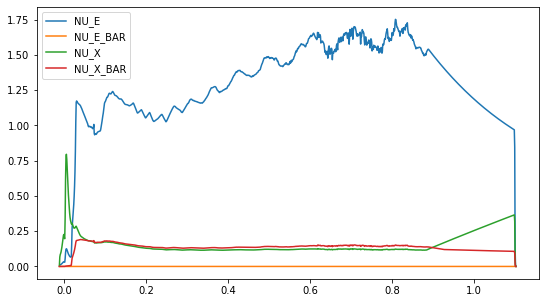

In [46]:
fig, ax = plt.subplots(1, figsize=(9,5))

for flavor in Flavor:
    ax.plot(time, E_per_V[flavor], label=flavor.name)
ax.legend()

In [48]:
outfile = 'test.root'
file = uproot.recreate(outfile)
file['hist'] = np.histogram(np.random.normal(0, 1, int(1e6)))
file['hist']

<TH1D (version 3) at 0x7f3bc5cbba58>